In [4]:
import sys
sys.path.append(r'/Users/mzalaya/Library/CloudStorage/Dropbox/research/git/wasslsp/src/')

import warnings
warnings.filterwarnings('ignore')

import torch

import numpy as np
import scipy as scp

import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
#from matplotlib import rc
#rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 8, # 12
          'font.size': 8, # 12
          'legend.fontsize': 8, # 12
          'xtick.labelsize': 8, # 10
          'ytick.labelsize': 8, # 10
          'text.usetex': True,
          'figure.figsize': (10, 8)}
plt.rcParams.update(params)

import seaborn as sns

from src.utils import *
from src.kernels import Kernel

from scipy.stats import wasserstein_distance

In [5]:
from src.utils import *

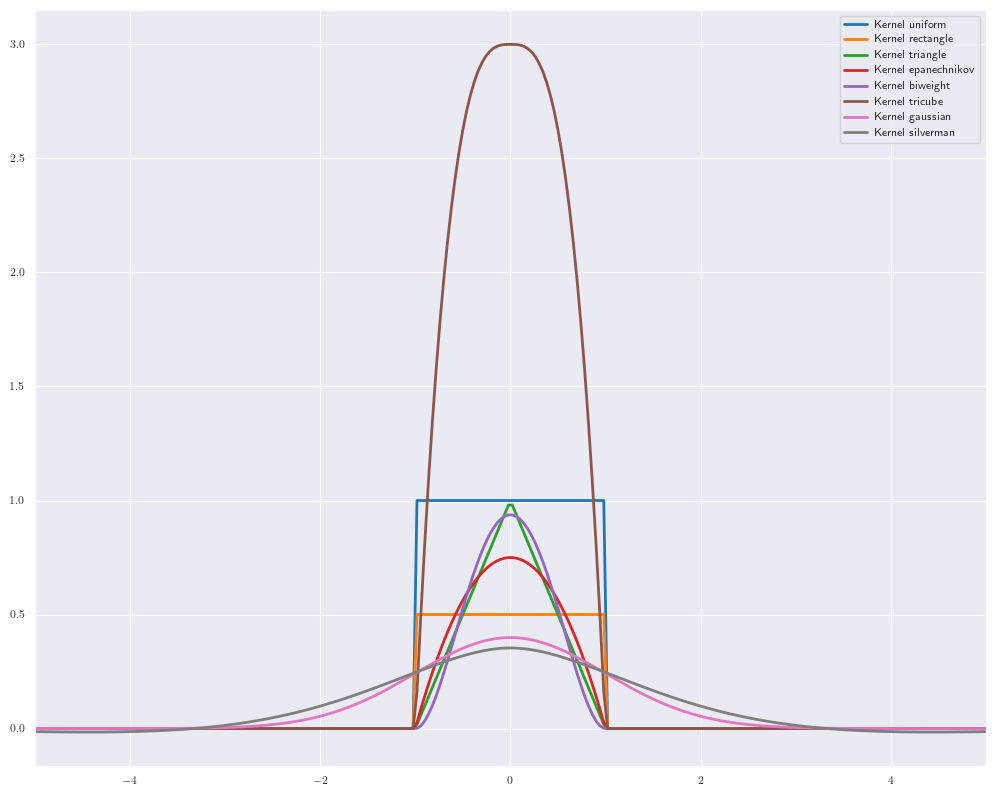

In [6]:
z = np.linspace(-10, 10, 500)
kernels = [
    uniform, rectangle, triangle, epanechnikov, biweight, tricube, gaussian, silverman,
]

for kernel in kernels:
    vectorize_kernel = np.vectorize(kernel)
    plt.plot(z, vectorize_kernel(z), lw=2, label='Kernel {}'.format(kernel.__name__))
    plt.xlim(-5, 5)
    plt.legend()
    plt.tight_layout()


In [36]:
zetas = np.linspace(1e-4, 0.5, 1000, endpoint=False)
Cs = np.linspace(0.1, 1, 1000, endpoint=True)
# Cs = np.linspace(1, 1, 1000, endpoint=True)
sample_times = [100, 1000, 10000]
T = 2000
bandwidths = Cs * T**(-zetas)
# bandwidths = T**(-zetas)

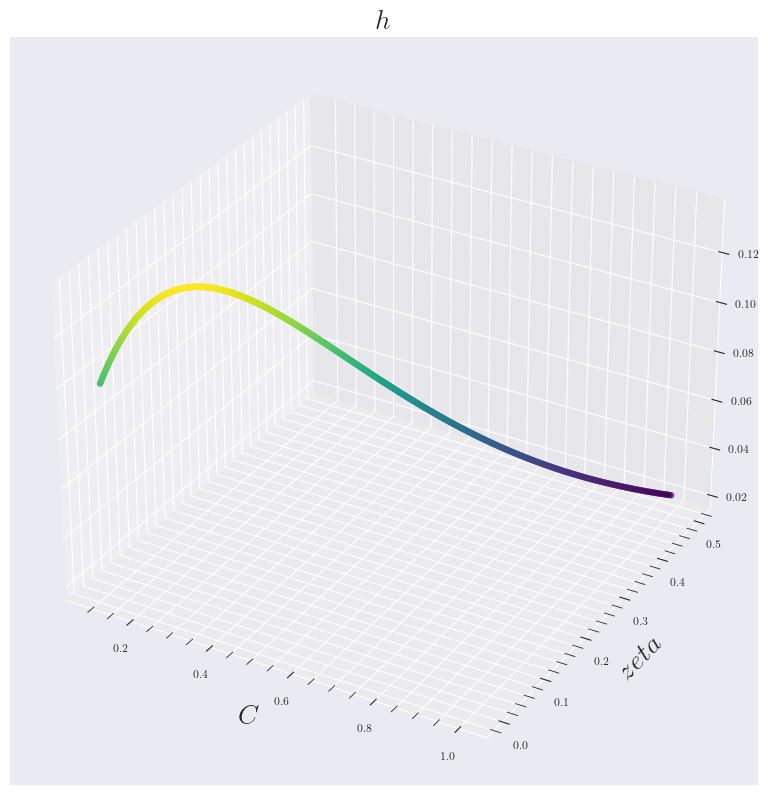

In [37]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
plt.minorticks_on()
# ax.contour3D(u_mesh, y_mesh, m_star_vals_mesh, 50, cmap='binary')
ax.scatter(Cs, zetas, bandwidths, c=bandwidths, cmap='viridis', linewidth=0.1)
ax.set_xlabel(r'$C$', fontsize=20)
ax.set_ylabel(r'$zeta$', fontsize=20)
ax.set_title(r'$h$', fontsize=20)
# plt.savefig("m_star_tvAR_2_cauchy.pdf", dpi=300)
plt.tight_layout()
plt.show()

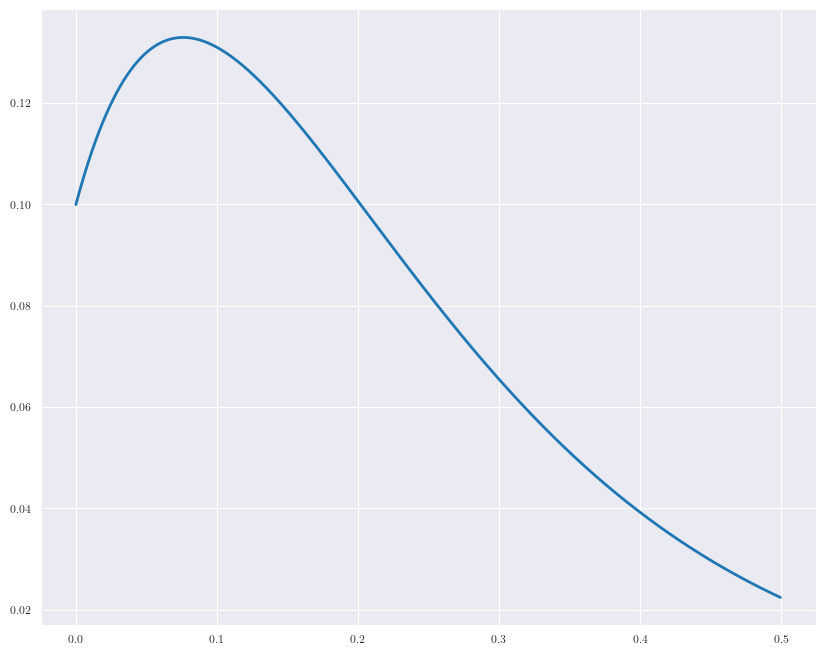

In [38]:
plt.plot(zetas, bandwidths, lw=2, label='Kernel')

In [39]:
bandwidths

array([0.09992402, 0.10044186, 0.10095434, 0.10146149, 0.10196333,
       0.10245991, 0.10295126, 0.10343741, 0.10391839, 0.10439423,
       0.10486497, 0.10533064, 0.10579127, 0.10624688, 0.10669752,
       0.10714322, 0.107584  , 0.10801989, 0.10845093, 0.10887715,
       0.10929858, 0.10971524, 0.11012717, 0.1105344 , 0.11093696,
       0.11133487, 0.11172817, 0.11211688, 0.11250104, 0.11288067,
       0.11325581, 0.11362647, 0.1139927 , 0.11435451, 0.11471194,
       0.11506502, 0.11541376, 0.11575821, 0.11609838, 0.11643431,
       0.11676602, 0.11709354, 0.11741689, 0.11773611, 0.11805122,
       0.11836225, 0.11866921, 0.11897215, 0.11927108, 0.11956604,
       0.11985704, 0.12014412, 0.12042729, 0.12070659, 0.12098203,
       0.12125365, 0.12152148, 0.12178552, 0.12204582, 0.12230239,
       0.12255525, 0.12280444, 0.12304998, 0.12329189, 0.1235302 ,
       0.12376492, 0.12399609, 0.12422372, 0.12444784, 0.12466848,
       0.12488565, 0.12509939, 0.1253097 , 0.12551662, 0.12572

In [40]:
zetas[999]

0.49950010000000006

In [41]:
Cs[999]

1.0